<a href="https://colab.research.google.com/github/nptan2005/spark401_colab/blob/main/notebooks/Spark_basic_excercises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Các bước cài đặt

## Cài java

```bash
!apt-get install -y openjdk-17-jdk
```

## Dowload spark-hadoop

```bash
!wget https://archive.apache.org/dist/spark/spark-4.0.1/spark-4.0.1-bin-hadoop3.tgz
!tar xf spark-4.0.1-bin-hadoop3.tgz
```

## Set environment và check pyspark version


```python
# ===============================
# Spark 4.0.1 Setup (REQUIRED)
# ===============================
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-4.0.1-bin-hadoop3"
os.environ["PATH"] += ":/content/spark-4.0.1-bin-hadoop3/bin"

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spark401-Training") \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

print("Spark version:", spark.version)
```


In [1]:
!apt-get install -y openjdk-17-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common librsvg2-common libxcomposite1 libxt-dev
  libxtst6 libxxf86dga1 openjdk-17-jre session-migration x11-utils
Suggested packages:
  gvfs libxt-doc openjdk-17-demo openjdk-17-source visualvm mesa-utils
The following NEW packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common librsvg2-common libxcomposite1 libxt-dev
  libxtst6 libxxf86dga1 openjdk-17-jdk openjdk-17-jr

In [2]:
!wget https://archive.apache.org/dist/spark/spark-4.0.1/spark-4.0.1-bin-hadoop3.tgz
!tar xf spark-4.0.1-bin-hadoop3.tgz

--2026-01-05 06:59:17--  https://archive.apache.org/dist/spark/spark-4.0.1/spark-4.0.1-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 548955321 (524M) [application/x-gzip]
Saving to: ‘spark-4.0.1-bin-hadoop3.tgz’

spark-4.0.1-bin-had 100%[===================>] 523.52M  6.84MB/s    in 3m 14s  

2026-01-05 07:02:32 (2.70 MB/s) - ‘spark-4.0.1-bin-hadoop3.tgz’ saved [548955321/548955321]



In [3]:
# ===============================
# Spark 4.0.1 Setup (REQUIRED)
# ===============================
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-4.0.1-bin-hadoop3"
os.environ["PATH"] += ":/content/spark-4.0.1-bin-hadoop3/bin"

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spark401-Training") \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

print("Spark version:", spark.version)

Spark version: 4.0.1


# 🧱 LEVEL -1 (BẮT BUỘC): DATA THINKING

Trước khi code, phải hiểu:
*	Data là bảng
*	Mỗi phép biến đổi = đổi hình dạng bảng
*	Performance = số lần scan + copy data

Nếu thiếu level này → Spark sẽ là “ma thuật đen”

---

## 🧱 LEVEL 0 – NUMPY (GỐC CỦA MỌI THỨ)

Vì sao cần NumPy?
*	Pandas dùng NumPy
*	Spark vectorization bắt nguồn từ đây
*	Hiểu memory layout

Bạn cần nắm:

```python
import numpy as np

a = np.array([1,2,3,4])
a * 10
```

* 👉 Không loop
* 👉 Vectorized
* 👉 Rất nhanh

**Câu hỏi bắt buộc:**

>❓ Vì sao numpy nhanh hơn for-loop Python?

>>Vì chạy trên C, contiguous memory

In [4]:
!pip install numpy

In [5]:
# Mang 1 chiều
import numpy as np

arr = np.array([1,2,3,4])

print(arr)

[1 2 3 4]


In [6]:
# Mãng 2 chiều

arr1 = np.array([[1,2,3], [4,5,6]])

print(arr1)


[[1 2 3]
 [4 5 6]]


In [7]:
# Mãng 3 chiều

arr2 = np.array(([(1,2,3),(4,5,6)],
                 [(7,8,9),(10,11,21)],
                 [(22,54,35),(31,53,5)]),dtype=int)

print(arr2)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 21]]

 [[22 54 35]
  [31 53  5]]]


In [1]:
print("Kieu du lieu trong mang", arr2.dtype)
print("Kich thuoc mang", arr2.shape)
print("So luong chieu", arr2.ndim)
print("So luong phan tu", arr2.size)
#

NameError: name 'arr2' is not defined

In [5]:
import numpy as np
a = np.array ([[1,2,3], [3,4,5], [4,5,6]])
print (a[1:])


[[3 4 5]
 [4 5 6]]


In [6]:
data = np.array ([1,2,3])
print (data [0])
print (data [1])
print (data [0: 2])
print (data [1:])
print (data [- 2:])


1
2
[1 2]
[2 3]
[2 3]


In [9]:
a = np.array ([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print(a > 5)

five_up = (a>= 5)
print (a [five_up])


[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
[ 5  6  7  8  9 10 11 12]


In [10]:
a = np.array ([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

b = np.where (a <5)
print (b)


(array([0, 0, 0, 0]), array([0, 1, 2, 3]))


In [11]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.concatenate((arr1, arr2))
print(arr)


[1 2 3 4 5 6]


In [12]:
arr1 = np.array ([[1, 2], [3, 4]])
arr2 = np.array ([[5, 6], [7, 8]])
arr = np.concatenate ((arr1, arr2 ), axis = 1)
print (arr)


[[1 2 5 6]
 [3 4 7 8]]


In [13]:
arr1 = np.array ([1, 2, 3])
arr2 = np.array ([4, 5, 6])
arr = np.stack ((arr1, arr2), axis = 1)
print (arr)


[[1 4]
 [2 5]
 [3 6]]


In [17]:
arr1 = np.array ([1, 2, 3])
arr2 = np.array ([4, 5, 6])
arr = np.hstack ((arr1, arr2)) #h đề cập đến hàng ngang tức là hàng in (arr )

print(arr)

[1 2 3 4 5 6]


In [18]:
arr1 = np.array ([1, 2, 3])
arr2 = np.array ([4, 5, 6])
arr = np.vstack ((arr1, arr2))
print (arr)


[[1 2 3]
 [4 5 6]]


In [24]:
arr = np.array ([1, 2, 3, 4, 5, 6])
newarr = np.array_split (arr, 3)
print (newarr)


[array([1, 2]), array([3, 4]), array([5, 6])]


In [25]:
arr = np.array ([1, 2, 3, 4, 5, 6])
newarr = np.array_split (arr, 3)

print (newarr [0])
print (newarr [1])
print (newarr [2] )


[1 2]
[3 4]
[5 6]


In [27]:
arr = np.array ([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
newarr = np.array_split ( arr, 3)
print (newarr)


[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]


In [28]:
arr = np.array ([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])
arr1 = np.hsplit (arr, 3)

print(arr1)

[array([[ 1,  2,  3,  4],
       [13, 14, 15, 16]]), array([[ 5,  6,  7,  8],
       [17, 18, 19, 20]]), array([[ 9, 10, 11, 12],
       [21, 22, 23, 24]])]


In [29]:
a = np.array ([1, 2, 3, 4])
# Add all of the elements in the array
print (a.sum())


10


In [30]:
a = np.array ([[1,2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print (a.sum ())


78


In [31]:
a = np.array ([1, 2, 3])
print (a)

b = np.array ([10,10,10])
print (b)

print (np.add (a, b))
print (np .subtract (a, b))
print (np.multiply (a, b))
print (np.divide (a, b))


[1 2 3]
[10 10 10]
[11 12 13]
[-9 -8 -7]
[10 20 30]
[0.1 0.2 0.3]


In [32]:
a = np.array ([1,2,3,4])
b = np.array ([10,20,30,40])
c = a * b
print (c)


[ 10  40  90 160]


In [3]:
import numpy as np
a1 = np.array([[0.0,0.0,0.0], [10.0,10.0,10.0], [20.0,20.0,20.0], [30.0,30.0,30.0]])
b1 = np.array ([1.0,2.0, 3.0])
print (a1)
print (b1)
print (a1 + b1)


[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
[1. 2. 3.]
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [4]:
arr = np.array ([1, 2, 3])

for x in arr:
  print(x)


1
2
3


In [5]:
arr = np.array ([[1, 2, 3], [4, 5, 6]])

for x in arr:
  print (x)


[1 2 3]
[4 5 6]


In [7]:
arr = np.array ([1, 2, 3, 4, 5, 4, 4], dtype='int64')

x = np.where (arr == 4)
print (x)


(array([3, 5, 6]),)


In [8]:
arr = np.array ([1, 2, 3, 4, 5, 6, 7, 8])

x = np.where (arr% 2 == 0)
print (x)


(array([1, 3, 5, 7]),)


In [15]:

x = np.random.randint(100)

y = np.random.rand()

z = np.random.randn()

j = np.random.randint(100, size = 5)

print(x)
print(y)
print(z)
print(j)

g = np.random.choice([3, 5, 7, 9])

print(g)
#

54
0.4436016987832221
-0.4823752273420049
[ 3 72 59 40 72]
3


In [17]:
import numpy as np
a = np.array([0,30,45,60,90])

print('Sine of different angles:')
# Convert to radians by multiplying with pi/180
print (np.sin(a*np.pi/180))
print ('\n' )

print ('Cosine values for angles in array:')
print (np.cos(a*np.pi/180))
print ('\n' )

print ('Tangent values for given angles:' )
print (np.tan(a*np.pi/180))


Sine of different angles:
[0.         0.5        0.70710678 0.8660254  1.        ]


Cosine values for angles in array:
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]


Tangent values for given angles:
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]


In [20]:
import numpy as np
a = np.array([(1,2,3,5,6,7,8,9)])
print(a.itemsize)


8


In [21]:
import numpy as np
a = np.array([(1,2,3,4,5,6)])
print(a.size)
print(a.shape)


6
(1, 6)


In [19]:
import numpy as np
a = np.array([(1,2,3),(4,5,6)])
print(a.ndim)


2


In [22]:
import numpy as np
a = np.array([(8,9,10),(11,12,13)])
print(a)
a=a.reshape(3,2)
print(a)


[[ 8  9 10]
 [11 12 13]]
[[ 8  9]
 [10 11]
 [12 13]]


In [23]:
import numpy as np
a=np.array([(1,2,3,4),(3,4,5,6)])
print(a[0,2])


3


In [37]:
import numpy as np
a=np.array([(1,2,3,4),(3,4,5,6)])
print(a[0:,1])


[2 4]


In [41]:
import numpy as np
a=np.array([(8,9),(10,11),(12,13)])
print(a[0:2,1])


[ 9 11]


In [42]:
import numpy as np
a=np.linspace(1,3,10)
print(a)


[1.         1.22222222 1.44444444 1.66666667 1.88888889 2.11111111
 2.33333333 2.55555556 2.77777778 3.        ]


In [43]:
import numpy as np

a= np.array([1,2,3])
print(a.min())
print(a.max())
print(a.sum())


1
3
6


In [44]:
import numpy as np
a= np.array([(1,2,3),(3,4,5)])
print(a.sum(axis=0))

print(a.sum(axis=1))

[4 6 8]
[ 6 12]


In [45]:
import numpy as np
a=np.array([(1,2,3),(3,4,5,)])
print(np.sqrt(a))
print(np.std(a))


[[1.         1.41421356 1.73205081]
 [1.73205081 2.         2.23606798]]
1.2909944487358056


In [46]:
import numpy as np
x= np.array([(1,2,3),(3,4,5)])
y= np.array([(1,2,3),(3,4,5)])
print(x+y)


[[ 2  4  6]
 [ 6  8 10]]


In [47]:
import numpy as np
x= np.array([(1,2,3),(3,4,5)])
y= np.array([(1,2,3),(3,4,5)])
print(x-y)
print(x*y)
print(x/y)


[[0 0 0]
 [0 0 0]]
[[ 1  4  9]
 [ 9 16 25]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [48]:
import numpy as np
x= np.array([(1,2,3),(3,4,5)])
y= np.array([(1,2,3),(3,4,5)])
print(np.vstack((x,y)))
print(np.hstack((x,y)))


[[1 2 3]
 [3 4 5]
 [1 2 3]
 [3 4 5]]
[[1 2 3 1 2 3]
 [3 4 5 3 4 5]]


In [49]:
import numpy as np
x= np.array([(1,2,3),(3,4,5)])
print(x.ravel())


[1 2 3 3 4 5]


# 🧱 LEVEL 1 – PANDAS (BẮT BUỘC PHẢI THUẦN)

Spark DataFrame = Pandas DataFrame phân tán

Nếu pandas chưa chắc → Spark chắc chắn mơ hồ.

## 1️⃣ Tạo DataFrame

In [7]:
import pandas as pd

df = pd.DataFrame({
    "customer_id": ["1", "2", "3","1"],
    "amount": [100, 200, 300,500]
})

df.head()
#

,customer_id,amount
0,1,100
1,2,200
2,3,300
3,1,500


## 2️⃣ Select / Filter (cốt lõi)

👉 Tư duy filter này phải thành phản xạ


In [5]:
df[df["amount"] > 150]

df.head()

,customer_id,amount
0,1,100
1,2,200
2,3,300


## 3️⃣ GroupBy (NGUỒN GỐC SHUFFLE)

🔥 Spark groupBy = pandas groupby × cluster

Nếu pandas groupby chưa hiểu → Spark shuffle sẽ mù

In [9]:
df1 = df.groupby("customer_id").sum()

df1.head()

,amount
customer_id,
1,600
2,200
3,300


## 4️⃣ Join (NGUỒN GỐC TAI NẠN)

* 👉 Đây chính là Spark join
* 👉 Nhưng pandas fail khi data lớn

Spark sinh ra để giải quyết chỗ này

In [15]:
customer = pd.DataFrame({
  "customer_id": [1,2,3,4,5,6],
  "phone": ['1234','45678','1334','2222','44444','25235']
})



order = pd.DataFrame({
  "order_id": [1,2,3,4,5,6,7,8,9],
  "customer_id": [1,2,3,4,5,6,1,4,6],
  "amount": [100,200,300,400,500,600,700,900,1000]
})

customer.head()
order.head()

,order_id,customer_id,amount
0,1,1,100
1,2,2,200
2,3,3,300
3,4,4,400
4,5,5,500


In [16]:
order.merge(customer, on="customer_id", how="left")

,order_id,customer_id,amount,phone
0,1,1,100,1234
1,2,2,200,45678
2,3,3,300,1334
3,4,4,400,2222
4,5,5,500,44444
5,6,6,600,25235
6,7,1,700,1234
7,8,4,900,2222
8,9,6,1000,25235


In [18]:
df = pd.read_csv("sample_data/california_housing_train.csv")

df.head()
#

# Xem chiều dài của df, tương đương shape[0]
print('Len:', len(df))
# Xem thông tin dataframe vừa đọc được
df.info()
# Xem kích thước của dataframe
print('Shape:', df.shape)


Len: 17000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
Shape: (17000, 9)


In [19]:
df['longitude'].head()
#


,longitude
0,-114.31
1,-114.47
2,-114.56
3,-114.57
4,-114.57


In [20]:
df[['longitude', 'households']].head(5)


,longitude,households
0,-114.31,472.0
1,-114.47,463.0
2,-114.56,117.0
3,-114.57,226.0
4,-114.57,262.0


In [22]:
df[0:5]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
condition = df[df['households'] < 200]
condition[:5]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
17,-114.65,32.79,21.0,44.0,33.0,64.0,27.0,0.8571,25000.0
19,-114.67,33.92,17.0,97.0,24.0,29.0,15.0,1.2656,27500.0
21,-114.73,33.43,24.0,796.0,243.0,227.0,139.0,0.8964,59200.0


from matplotlib import pyplot as plt
_df_0['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
import random

df_len = len(df)
birthday = [random.randrange(1980, 2000, 1) for i in range(df_len)]
df['birthday'] = birthday
df.tail(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,birthday
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,1986
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,1986
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,1980
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,1990
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0,1980


In [25]:
from datetime import datetime

now = datetime.now().year
df['age'] = now - df['birthday']
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,birthday,age
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,1986,40
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,1986,40
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,1980,46
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,1990,36
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0,1980,46


In [26]:
df['is_young'] = df['age'] < 30
df.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,birthday,age,is_young
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1980,46,False
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1988,38,False
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,1980,46,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1993,33,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1989,37,False


In [27]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,birthday,age
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,1989.516588,36.483412
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,5.772504,5.772504
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1980.000000,27.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,1985.000000,31.750000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,1990.000000,36.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,1994.250000,41.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1999.000000,46.000000


In [28]:
df['age'].value_counts()


,count
age,
41,891
32,885
28,885
29,880
42,870
46,865
35,860
37,852
33,849


<Axes: xlabel='age'>

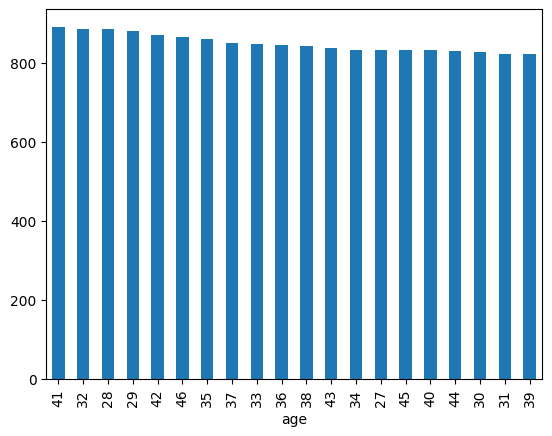

In [29]:
df['age'].value_counts().plot(kind='bar')


# 🧱 LEVEL 3 – SPARK (LÚC NÀY MỚI HỌC)

Khi đã có:

*	pandas → hiểu logic

*	numpy → hiểu memory

*	sql → hiểu optimizer

👉 Spark sẽ trở nên rất logic, không còn “ảo thuật”